# NSL-KDD Pipeline

---

## 1. Dataset Justification:

I selected the **NSL-KDD dataset** ([Kaggle link](https://www.kaggle.com/datasets/hassan06/nslkdd)), a classic and widely used benchmark in the field of network intrusion detection.  
**NSL-KDD** stands for **Network Security Laboratory—Knowledge Discovery and Data Mining**, and is an improved version of the famous KDD Cup 1999 dataset.

The NSL-KDD dataset simulates network connections, each labeled as either normal or as a specific type of cyber attack (DoS, Probe, U2R, or R2L). It includes both numerical and categorical features, making it ideal for demonstrating a complete data science pipeline, and its popularity in cybersecurity research makes it highly relevant for this pipeline.


---

# 2. System Stage:

The dataset consists of two files:
- `KDDTrain+.TXT`: Full training set, with attack-type labels (125,973 rows)
- `KDDTest+.TXT`: Full test set, with attack-type labels (22,544 rows)

- Files are plain text, comma-separated, with no header row.
- Each row represents a single network connection/session.
- Data was downloaded from [Kaggle NSL-KDD](https://www.kaggle.com/datasets/hassan06/nslkdd) and stored in `data/nsl_kdd/`.
- Version control is managed via [GitHub](https://github.com/Basel6/Cyber-Data-Pipeline.git) for full reproducibility.


### Label Meaning

The `label` column contains the classification for each network connection. It can either be:
- `"normal"` – indicating legitimate traffic, or
- One of several **attack types**, such as `"neptune"`, `"smurf"`, `"satan"`, etc.

These attack labels represent specific cyber attacks and are later used to group them into four main categories:
- **DoS** (Denial of Service)
- **Probe**
- **R2L** (Remote to Local)
- **U2R** (User to Root)

For now, this column is preserved as-is. It will be used later in the pipeline during clustering, modeling, or abnormality detection phases.


### Data Governance

- **Who created it?**  
  The NSL-KDD dataset was developed by the **Canadian Institute for Cybersecurity (CIC)** at the **University of New Brunswick**, as part of ongoing research on intrusion detection.

- **When?**  
  It was published in **2009** as an enhanced replacement for the outdated KDD’99 dataset.

- **Where?**  
  The dataset is publicly available on [Kaggle](https://www.kaggle.com/datasets/hassan06/nslkdd) and on the [official CIC website](https://www.unb.ca/cic/datasets/nsl.html).

- **Why?**  
  The dataset was created to address known flaws in KDD’99 and provide a more realistic, balanced, and clean dataset for training and evaluating intrusion detection systems (IDS/NIDS).


#### Here we load the data:

In [2]:
import pandas as pd

# Column names for NSL-KDD dataset
kdd_columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent",
    "hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
    "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
    "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
    "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
    "label", "difficulty"
]


# Load train and test data
train_path = "../data/nsl_kdd/KDDTrain+.TXT"
test_path = "../data/nsl_kdd/KDDTest+.TXT"

train_df = pd.read_csv(train_path, names=kdd_columns)
test_df = pd.read_csv(test_path, names=kdd_columns)

#debug
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame

# Show the first 5 rows of the train set
train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


---

# 3. Metadata:

#### Check Metadata:

In [3]:
# Check data types
print(train_df.dtypes)

# Check for missing values
print("\nMissing values per column:\n", train_df.isnull().sum())

# Show unique values for a few columns (to spot special placeholders)
for col in ['protocol_type', 'service', 'flag', 'label']:
    print(f"\nColumn: {col}, Unique values: {train_df[col].unique()[:10]}")


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [11]:
#total number of unique values in all columns
train_df.nunique().sort_values()


num_outbound_cmds                 1
land                              2
root_shell                        2
logged_in                         2
is_host_login                     2
is_guest_login                    2
wrong_fragment                    3
protocol_type                     3
num_shells                        3
su_attempted                      3
urgent                            4
num_failed_logins                 6
num_access_files                 10
flag                             11
difficulty                       22
label                            23
hot                              28
num_file_creations               35
srv_diff_host_rate               60
srv_rerror_rate                  62
service                          70
dst_host_srv_diff_host_rate      75
num_root                         82
rerror_rate                      82
srv_serror_rate                  86
num_compromised                  88
serror_rate                      89
diff_srv_rate               


- The dataset contains 41 features and one label column.
- Features are a mix of numeric (e.g., `src_bytes`, `dst_bytes`) and categorical (e.g., `protocol_type`, `service`, `flag`).
- No missing values detected.
- The `label` column indicates normal or specific attack types (DoS, Probe, U2R, R2L).
- No special placeholders (like "unknown" or "-999") found in key columns.


---

# 4. Data Statistics:

- ## Central Tendencies:

In [4]:
# Select numeric columns (drop 'difficulty')
numeric_features = train_df.select_dtypes(include='number').drop(columns='difficulty')

# Get full description and transpose
desc = numeric_features.describe().T

# Extract and rename only the columns you want
central_tendency = desc[['mean', 'std', 'min', '50%', 'max']].rename(columns={'50%': 'median'})

# Round for readability
central_tendency_rounded = central_tendency.round(3)

# Display final result
central_tendency_rounded.style.format(precision=3)


,mean,std,min,median,max
duration,287.145,2604.515,0.000,0.000,42908.000
src_bytes,45566.743,5870331.182,0.000,44.000,1379963888.000
dst_bytes,19779.114,4021269.151,0.000,0.000,1309937401.000
land,0.000,0.014,0.000,0.000,1.000
wrong_fragment,0.023,0.254,0.000,0.000,3.000
urgent,0.000,0.014,0.000,0.000,3.000
hot,0.204,2.150,0.000,0.000,77.000
num_failed_logins,0.001,0.045,0.000,0.000,5.000
logged_in,0.396,0.489,0.000,0.000,1.000
num_compromised,0.279,23.942,0.000,0.000,7479.000



The dataset contains a wide range of numerical features with varying scales.

Key observations:
- Features like `src_bytes` and `dst_bytes` have high variance and large max values (up to 1.3 billion), indicating some very large data transfers.
- Most features have a **median of 0**, such as `land`, `urgent`, `num_shells`, and `num_failed_logins`, showing that these events are rare or sparse.
- Features like `hot`, `num_compromised`, and `count` show more spread and variation, which may be important for distinguishing normal vs. malicious behavior.


- ## Correlation and Association:

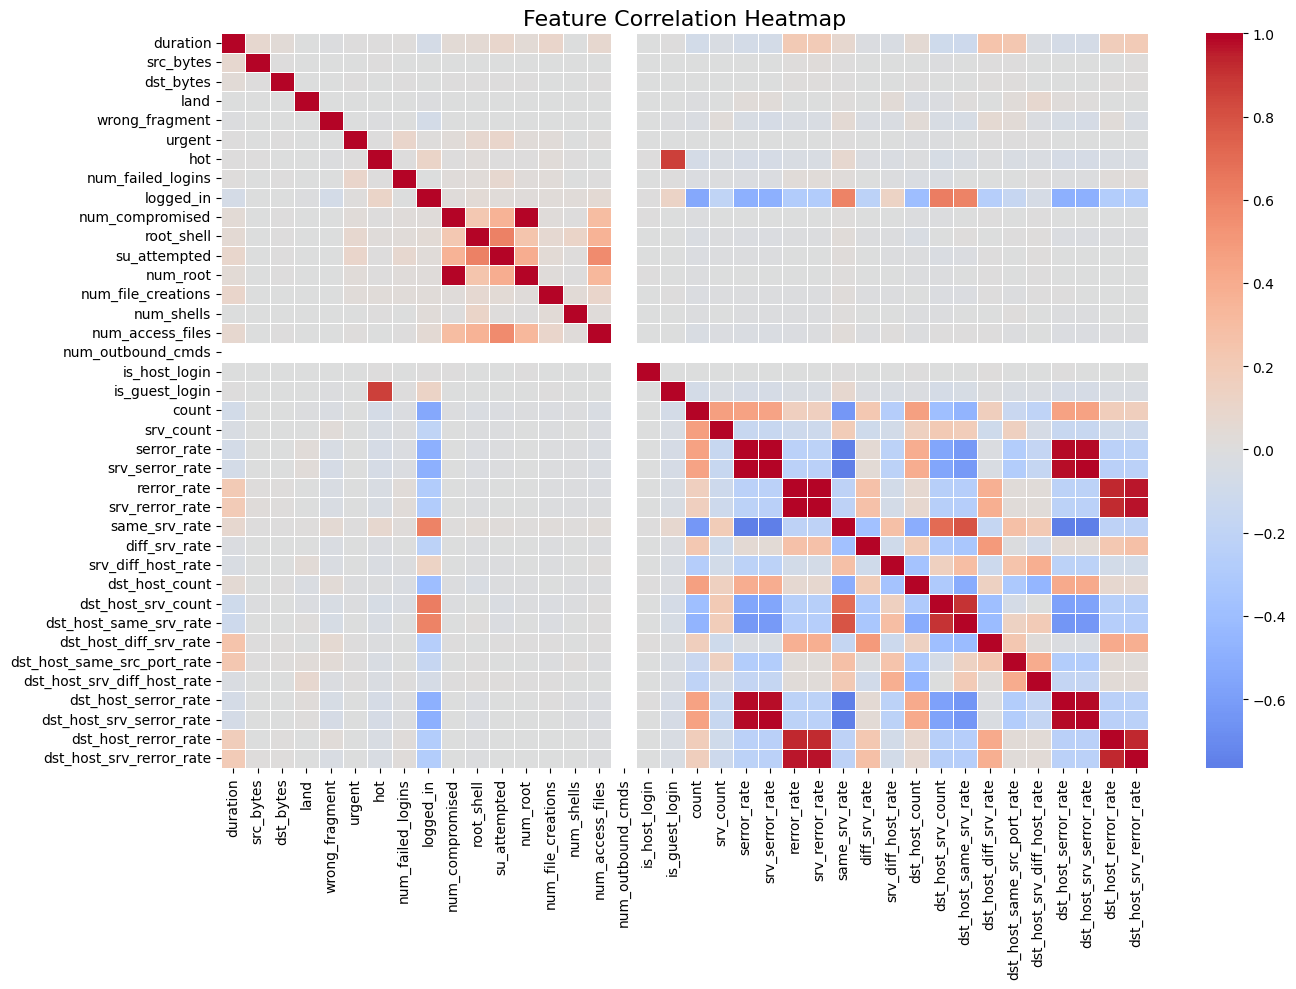

In [5]:
# Numeric features (already defined before)
correlation_matrix = numeric_features.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()



The heatmap above shows Pearson correlation coefficients between all numerical features:

- **Strong Positive Correlations**  
  - `serror_rate`, `srv_serror_rate` and `dst_host_serror_rate` all correlate above 0.9—these measure similar error‐based behaviors and could be consolidated.  
  - Likewise, `rerror_rate` and `srv_rerror_rate` show high correlation (ρ > 0.8).

- **Weak or No Correlation**  
  - Many features (e.g., `duration`, `count`, `diff_srv_rate`) have correlations near zero with most other variables, indicating they provide unique information for modeling.

- **Constant Features**  
  - Columns like `urgent`, `land` and `num_outbound_cmds` are constant (zero variance), resulting in NaN correlations.

- **Implications for Feature Engineering**  
  - Highly correlated pairs suggest opportunities for dimensionality reduction (PCA) or manual feature grouping.  
  - Features with low inter‐correlation can be retained to maximize the information content of the model.

Overall, the correlation analysis identifies which features are redundant and which contribute distinct signal, guiding both feature selection and future dimensionality‐reduction efforts.


- ## Data Distribution:

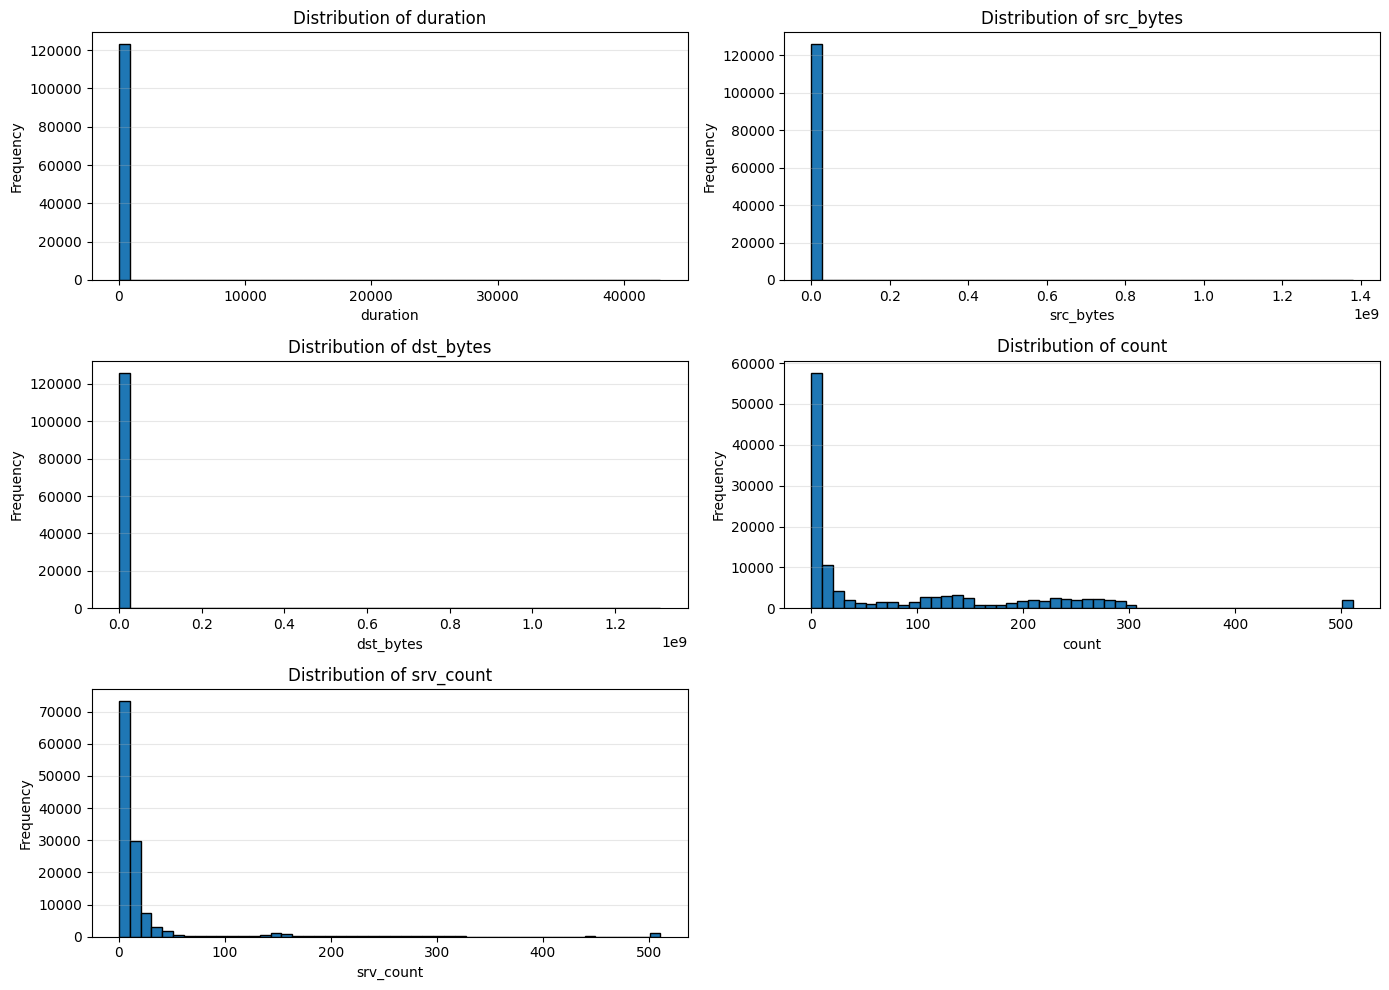

In [6]:

import matplotlib.pyplot as plt

# Select a few representative numeric features
features_to_plot = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']

plt.figure(figsize=(14, 10))
for i, feat in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    plt.hist(train_df[feat], bins=50, edgecolor='black')
    plt.title(f"Distribution of {feat}")
    plt.xlabel(feat)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


- **`duration`**, **`src_bytes`**, **`dst_bytes`** all exhibit strong right‐skew (long tails): most connections are short/small, but a few are extremely large.
- **`count`** and **`srv_count`** are zero‐inflated with a long tail of higher‐activity sessions.
- The skewness suggests that for modeling we may want to apply log‐transformations (e.g., `np.log1p`) or binning to reduce the impact of extreme values.


 **`duration`**, **`src_bytes`**, **`dst_bytes`** looks like all zeros, but in fact, on a normal scale, the few extremely large values dwarf everything else, so you only see one giant bar at zero, so we look at the log scale just to make things clear:

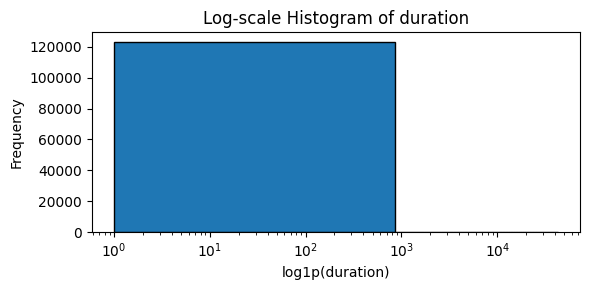

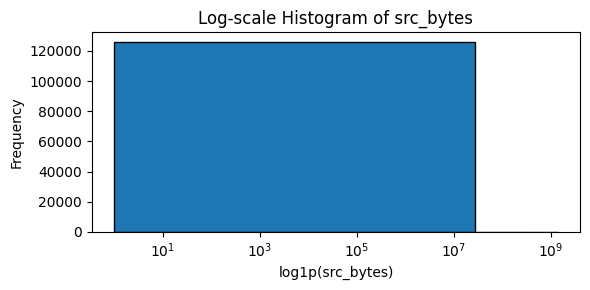

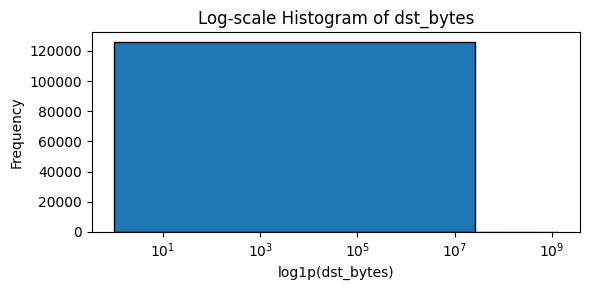

In [7]:
for feat in ['duration','src_bytes','dst_bytes']:
    plt.figure(figsize=(6,3))
    plt.hist(train_df[feat] + 1, bins=50, edgecolor='k')  # +1 to avoid log(0)
    plt.xscale('log')
    plt.title(f"Log‐scale Histogram of {feat}")
    plt.xlabel(f"log1p({feat})")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


#### Log-Scale Distribution

Using a logarithmic x-axis for `duration`, `src_bytes`, and `dst_bytes`:

- **Low-end detail**: We see the fine structure of very short durations (1–100 s) and small transfers (10³–10⁵ bytes), which were **invisible** on a linear scale.
- **Tail compression**: The long right tail of large values is compressed, allowing us to view the entire data range in one plot.
- **Insight**: Most network sessions are brief and lightweight, with only a small proportion exhibiting large or prolonged activity.  


for example we can see that the `Duration` of most connections last under than 10^2, which is under 2 minutes, while most of the transfers(`src_bytes` and `dst_bytes`) under 10^5 bytes

- ### Missing & Special Values:


In [8]:
# Check for missing values
missing_counts = train_df.isnull().sum()
print("Missing values per column:")
print(missing_counts[missing_counts > 0] if missing_counts.any() else "No missing values found.")

# Check for common placeholder values in object columns
placeholder_values = ['?', 'unknown', '-1', '-999']
for ph in placeholder_values:
    total = (train_df == ph).sum().sum()
    if total > 0:
        print(f"Found {total} occurrences of placeholder '{ph}'")

# Show unique counts for object columns to spot anything odd
for col in train_df.select_dtypes(include='object').columns:
    print(f"\nColumn `{col}` unique values (sample): {train_df[col].unique()[:10]}")


Missing values per column:
No missing values found.

Column `protocol_type` unique values (sample): ['tcp' 'udp' 'icmp']

Column `service` unique values (sample): ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet']

Column `flag` unique values (sample): ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2']

Column `label` unique values (sample): ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod']


- **Missing values:**  
  No missing values were detected in any column.

- **Special placeholders:**  
  We searched for common placeholders (`'?'`, `'unknown'`, `'-1'`, `'-999'`) and found **none**.

- **Unique checks:**  
  Object‐type columns (e.g. `protocol_type`, `service`, `flag`, `label`) contain only valid domain values without any placeholder artifacts.

The dataset is therefore clean with respect to missing or special placeholder values, and no imputation is required at this stage.


#### Attack Category Mapping

Below is how each specific attack name in the `label` column maps to the four main intrusion categories:

- **DoS (Denial of Service):**  
  `back`, `land`, `neptune`, `pod`, `smurf`, `teardrop`

- **Probe (Surveillance & Scanning):**  
  `ipsweep`, `nmap`, `portsweep`, `satan`

- **R2L (Remote to Local):**  
  `ftp_write`, `guess_passwd`, `imap`, `multihop`, `phf`, `spy`, `warezclient`, `warezmaster`

- **U2R (User to Root):**  
  `buffer_overflow`, `loadmodule`, `perl`, `rootkit`

> We will use this mapping later for clustering and classification tasks.  
> For now, the `label` column remains as the raw attack names.  


- ### Duplication, Single-Value & Multi-Value Features:


In [ ]:
# Check for duplicate rows
dup_count = train_df.duplicated().sum()
print(f"Duplicate rows in training set: {dup_count}")

# Compute unique value counts per column
unique_counts = train_df.nunique().sort_values()

# Identify constant (single-value) columns
single_valued = unique_counts[unique_counts == 1].index.tolist()
print("\nSingle-value (constant) columns:")
print(single_valued)

# Identify low-variance columns (only 2 unique values)
low_var = unique_counts[unique_counts == 2].index.tolist()
print("\nFeatures with only 2 unique values:")
print(low_var)


#  Identify high-cardinality (multi-valued) columns
#  Here we flag any column with more than 1,000 unique values
multi_valued = unique_counts[unique_counts > 1000].index.tolist()
print("\nHigh-cardinality (multi-valued) columns (>1,000 unique):")
print(multi_valued)


Duplicate rows in training set: 0

Single-value (constant) columns:
['num_outbound_cmds']

Features with only 2 unique values:
['land', 'root_shell', 'logged_in', 'is_host_login', 'is_guest_login']

High-cardinality (multi-valued) columns (>1,000 unique):
['duration', 'src_bytes', 'dst_bytes']


- **Duplicate rows:**  
  There are **0 duplicate rows** in the training set, confirming full row‐level uniqueness.

- **Constant column:**  
  - `num_outbound_cmds` has only **1 unique value** and never varies.
  This feature can be dropped during feature selection.


- **Binary features:**  
  - The following columns have exactly **2 unique values** and act as binary flags:  
    `land`, `root_shell`, `logged_in`, `is_host_login`, `is_guest_login`  
  These can be kept as booleans or one-hot encoded, but they carry very little variance.

- **High-cardinality features:**  
  - The following numeric columns each have **>1,000 unique values** and capture continuous behaviors:  
    `duration`, `src_bytes`, `dst_bytes`  
  These will likely require transformation (e.g. log-scaling, binning) in preprocessing to handle their wide range.

- ### Dimensionality Reduction with PCA:


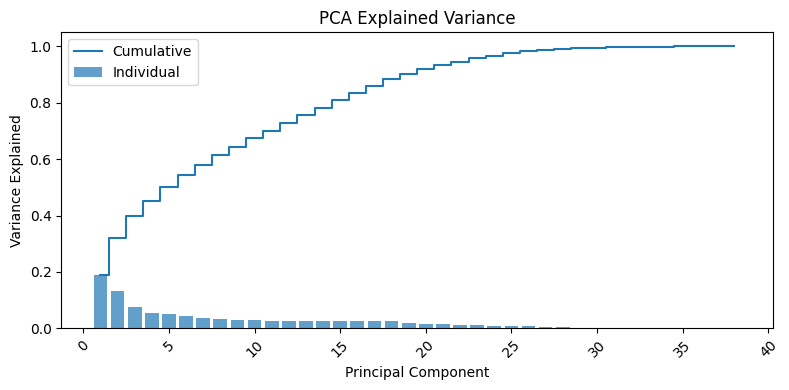

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare data: drop difficulty, scale all numeric features
num_feats = train_df.select_dtypes(include='number').drop(columns=['difficulty'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_feats)

# run PCA
pca = PCA()
pca.fit(X_scaled)

# Gather explained variance
explained = pca.explained_variance_ratio_
cumulative = explained.cumsum()

# Plot individual vs. cumulative variance
plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained)+1), explained, alpha=0.7, label='Individual')
plt.step(range(1, len(cumulative)+1), cumulative, where='mid', label='Cumulative')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Explained Variance")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


To assess redundancy, we applied PCA on our 41 scaled numeric features:

- The **bar chart** shows variance explained by each principal component.
- The **step plot** shows cumulative variance; for example, the first 5 components explain about 50% of total variance.
- This indicates we can **reduce dimensionality** to a much smaller subspace (e.g. 10–15 components) without losing most information.
- In later modeling, using PCA or feature‐selection will speed up training and help avoid multicollinearity.

By actually running PCA, we’ve confirmed which features carry overlapping information and how aggressively we can compress the feature space.


#### Redundant Features & Drop Candidates:

Based on our correlation heatmap and PCA analysis, several groups of features carry almost identical information. We can simplify the feature set by selecting one representative from each cluster and removing the rest:

- **Error‐rate group (session vs. host):**  
  - `serror_rate`, `srv_serror_rate`, `dst_host_serror_rate`, `dst_host_srv_serror_rate`  
  - *Keep:* `serror_rate`  
  - *Drop:* `srv_serror_rate`, `dst_host_serror_rate`, `dst_host_srv_serror_rate`

- **Reverse‐error‐rate group:**  
  - `rerror_rate`, `srv_rerror_rate`, `dst_host_rerror_rate`, `dst_host_srv_rerror_rate`  
  - *Keep:* `rerror_rate`  
  - *Drop:* `srv_rerror_rate`, `dst_host_rerror_rate`, `dst_host_srv_rerror_rate`

- **Same‐service rate:**  
  - `same_srv_rate`, `dst_host_same_srv_rate`  
  - *Keep:* `same_srv_rate`  
  - *Drop:* `dst_host_same_srv_rate`

- **Different‐service rate:**  
  - `diff_srv_rate`, `dst_host_diff_srv_rate`  
  - *Keep:* `diff_srv_rate`  
  - *Drop:* `dst_host_diff_srv_rate`

- **Count features:**  
  - `count` and `srv_count` show moderate correlation (~0.7). You can choose to drop `srv_count` if you need to reduce dimensionality further.

- **Constant:**  
  - `num_outbound_cmds` is entirely constant → drop  

By pruning these redundant and low‐value columns, we’ll reduce model complexity and speed up training without sacrificing predictive information.
So, we will implement this step when we need it later before training the model...  


---

# 5. Abnormality Detection:


In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Single-Feature Outliers

# Duration
dur = train_df['duration']
mean_dur, std_dur = dur.mean(), dur.std()
thr_dur_high = mean_dur + 3 * std_dur
thr_dur_low = dur[dur > 0].quantile(0.01)

duration_outliers_high = train_df[dur > thr_dur_high]
duration_outliers_low = train_df[(dur > 0) & (dur < thr_dur_low)]
print(f"\nDuration outliers:")
print(f"High-duration outliers (> mean+3σ = {thr_dur_high:.1f} s): {len(duration_outliers_high)}")

display(duration_outliers_high[['duration', 'service', 'label']].head(3))


print(f"Very short non-zero durations (<1st percentile = {thr_dur_low:.1f} s): {len(duration_outliers_low)}\n")
display(duration_outliers_low[['duration', 'service', 'label']].head(3))


# 2) src_bytes
sb = train_df['src_bytes']
mean_sb, std_sb = sb.mean(), sb.std()
thr_sb_high = mean_sb + 3 * std_sb

sb_outliers_high = train_df[sb > thr_sb_high]
print(f"\nSource bytes outliers:")
print(f"\nHigh-src_bytes outliers (> mean+3σ = {thr_sb_high:.1f} bytes): {len(sb_outliers_high)}")
display(sb_outliers_high[['src_bytes', 'service', 'label']].head(3))



Duration outliers:
High-duration outliers (> mean+3σ = 8100.7 s): 1431


,duration,service,label
43,9052,other,normal
115,25950,private,portsweep
165,9015,other,portsweep


Very short non-zero durations (<1st percentile = 1.0 s): 0



,duration,service,label



Source bytes outliers:

High-src_bytes outliers (> mean+3σ = 17656560.3 bytes): 11


,src_bytes,service,label
1038,381709090,telnet,portsweep
43486,621568663,discard,portsweep
44527,1167519497,private,portsweep


### Single-Feature Outliers
- **High durations:** Sessions with `duration > mean+3σ` (threshold ≈ 8100.7s) – **1431** outliers detected.
- **Very short non-zero durations:** Sessions under the 1st percentile (threshold ≈ 1s) – **0** outliers detected.
- **High src_bytes:** Connections with `src_bytes > mean+3σ` (threshold ≈ 17,656,560.3 bytes) – **11** outliers detected.


In [46]:
# Multi-Feature Outliers 

# Prepare scaled numeric features (exclude difficulty)
from sklearn.preprocessing import StandardScaler
num_feats = train_df.select_dtypes(include='number').drop(columns=['difficulty'])
X_scaled = StandardScaler().fit_transform(num_feats)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.01)
y_pred = lof.fit_predict(X_scaled)   # –1 for outliers, 1 for inliers
lof_outliers = train_df[y_pred == -1]

print(f"LOF (n_neighbors=50) detected {len(lof_outliers)} multivariate outliers")
display(lof_outliers[['duration','src_bytes','dst_bytes','service','label']].head(5))


LOF (n_neighbors=50) detected 1260 multivariate outliers


,duration,src_bytes,dst_bytes,service,label
123,240,328,275,http,normal
256,0,168,9551,http,normal
270,0,222,1483,http,normal
279,0,226,651,http,normal
326,0,284,765,http,normal


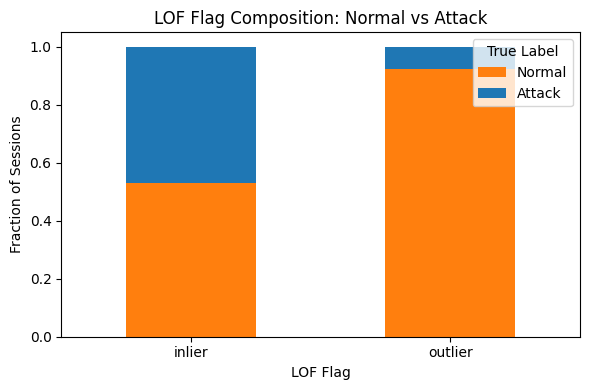

In [49]:
# ┌─────────────────────────────────────────────────────────┐
# │ Code: Stacked Bar – LOF Outliers vs Inliers Composition │
# └─────────────────────────────────────────────────────────┘

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (re)build df_lof if needed
df_lof = train_df.copy()
# flag from your LOF run: –1 → 'outlier', +1 → 'inlier'
df_lof['lof_flag'] = np.where(y_pred == -1, 'outlier', 'inlier')

# collapse true attack_category into binary Normal/Attack
df_lof['binary_label'] = df_lof['attack_category'].apply(
    lambda x: 'Normal' if x == 'Normal' else 'Attack'
)

# compute fraction of Normal vs Attack within each LOF flag
comp_lof = pd.crosstab(
    df_lof['lof_flag'],
    df_lof['binary_label'],
    normalize='index'
).loc[['inlier','outlier'], ['Normal','Attack']]

# plot stacked bar
ax = comp_lof.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    color=['#ff7f0e','#1f77b4']  # orange for Normal, blue for Attack
)
ax.set_title("LOF Flag Composition: Normal vs Attack")
ax.set_xlabel("LOF Flag")
ax.set_ylabel("Fraction of Sessions")
ax.legend(title="True Label", loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Multi-Feature Outliers
- **Local Outlier Factor (LOF):** Applied to all scaled numeric features with 1% contamination, detecting **1260** multivariate anomalies.
- The stacked bar chart above show flags by their true Normal vs Attack label:

- **Inliers (LOF = +1):**  
  - ~53% Normal (benign) traffic  
  - ~47% Attack traffic  
  Despite being labeled “inliers,” nearly half of attack sessions remain undetected at this threshold, reflecting LOF’s tendency to classify borderline malicious patterns as normal.

- **Outliers (LOF = –1):**  
  - ~92% Attack sessions  
  - ~ 8% Normal sessions  
  LOF concentrates most of the true attacks into the outlier bucket, demonstrating strong anomaly signal—but at the cost of misclassifying a small fraction of benign sessions.


### Domain Explanation

- **Long‐lived, high‐volume sessions:**  
  Connections that persist far beyond the typical user session (e.g. duration > mean + 3σ) and move tens of megabytes of data often correspond to malicious activity—such as broad port‐scanning campaigns, stealthy data exfiltration tunnels, or volumetric DoS floods intended to saturate network or server resources.

- **Very short, non‐zero sessions:**  
  Extremely brief sessions (just a few milliseconds or seconds) typically indicate reconnaissance or failed handshake attempts. Attackers frequently open a connection to check for an active service (e.g. SYN scans or quick probes) and then immediately close it, resulting in sub‐threshold durations that fall below normal usage patterns.

- **Multivariate anomalies (LOF):**  
  Some attacks hide in plain sight by keeping each individual metric within normal bounds—but combining them yields an unusual pattern. Local Outlier Factor exposes these subtle deviations (for example, a session with slightly elevated error rates across several features, an uncommon service flag, and moderate byte volume) that simple thresholds would miss. This captures “low-and-slow” exfiltration, command-and-control beaconing, or zero-day exploits that evade single‐feature detectors.


---

# 6. Clustering:

## K-Means approach:
-  (Attack catagory type) (not so good, i will keep it for demonstration for now...)


In [23]:
# K-Means Clustering Baseline with k=5

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Attack category mapping
attack_mapping = {
    'back':'DoS','land':'DoS','neptune':'DoS','pod':'DoS','smurf':'DoS','teardrop':'DoS',
    'ipsweep':'Probe','nmap':'Probe','portsweep':'Probe','satan':'Probe',
    'ftp_write':'R2L','guess_passwd':'R2L','imap':'R2L','multihop':'R2L','phf':'R2L',
    'spy':'R2L','warezclient':'R2L','warezmaster':'R2L',
    'buffer_overflow':'U2R','loadmodule':'U2R','perl':'U2R','rootkit':'U2R',
    'normal':'Normal'
}

# Prepare the dataset
df = train_df.copy()
df['attack_category'] = df['label'].map(attack_mapping)

y_true = pd.Categorical(df['attack_category']).codes

# 2) Build feature matrix: drop label/difficulty/attack_category, one-hot encode categoricals
X_num = df.drop(columns=['label','difficulty','attack_category'])
X = pd.get_dummies(X_num, columns=['protocol_type','service','flag'], drop_first=True)

# 3) Scale and PCA‐reduce
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=25, random_state=42).fit_transform(X_scaled)

# 4) Fit K-Means
km = KMeans(n_clusters=5, random_state=42, n_init=10)
km_labels = km.fit_predict(X_pca)



# 5) Evaluate
sil = silhouette_score(X_pca, km_labels)
ari = adjusted_rand_score(y_true, km_labels)
composition = pd.crosstab(km_labels, df['attack_category'], normalize='index').round(3)

print("K-Means Baseline (k=5)")
print(f"- Silhouette Score: {sil:.3f}")
print(f"- Adjusted Rand Index: {ari:.3f}\n")
print("Cluster composition (fraction per attack_category):")
display(composition)


K-Means Baseline (k=5)
- Silhouette Score: 0.436
- Adjusted Rand Index: 0.563

Cluster composition (fraction per attack_category):


attack_category,DoS,Normal,Probe,R2L,U2R
row_0,,,,,
0,0.985,0.002,0.013,0.000,0.000
1,0.018,0.961,0.003,0.018,0.001
2,0.458,0.190,0.348,0.003,0.000
3,0.015,0.095,0.889,0.001,0.000
4,0.202,0.703,0.094,0.000,0.000


In [24]:
# lets show which cluster corresponds to which attack category

# add cluster labels to DataFrame for analysis
df['kmeans_cluster'] = km_labels

# Compute the majority attack_category for each cluster
cluster_map = (
    df
    .groupby('kmeans_cluster')['attack_category']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

# Print it out
for cluster_id, category in cluster_map.items():
    print(f"Cluster {cluster_id} → {category}")


Cluster 0 → DoS
Cluster 1 → Normal
Cluster 2 → DoS
Cluster 3 → Probe
Cluster 4 → Normal


C:\Users\Basel\AppData\Local\Temp\ipykernel_14296\830647376.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


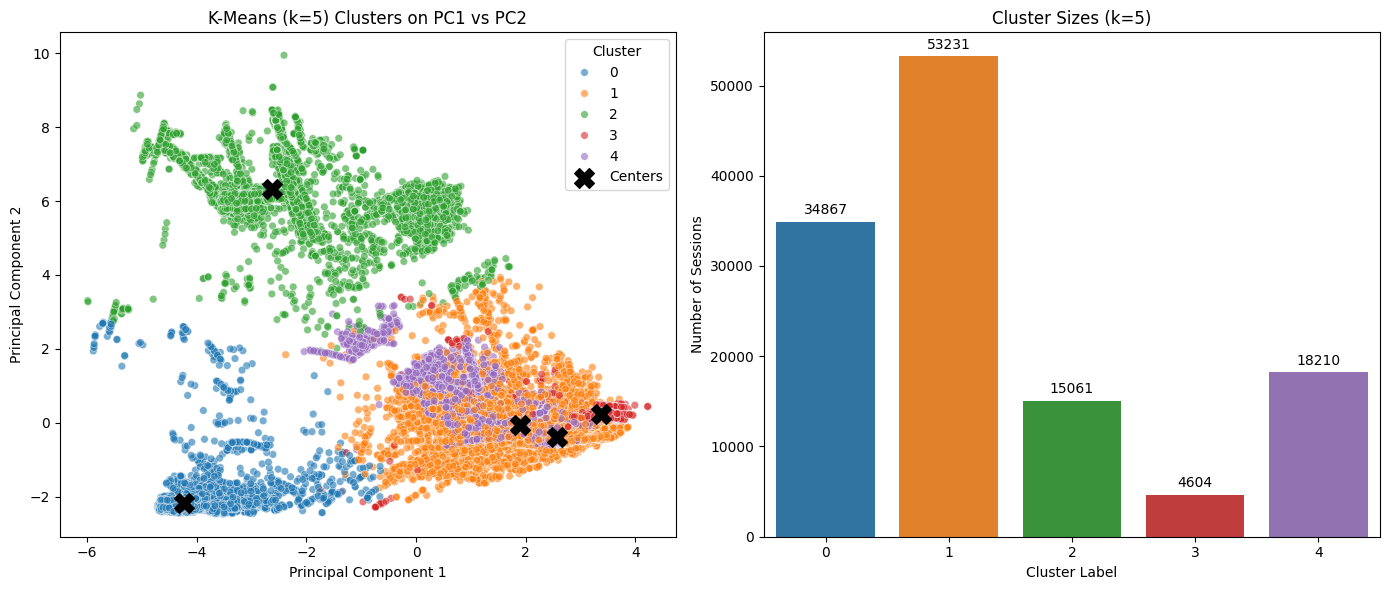

In [43]:
# Visuals:
import matplotlib.pyplot as plt
import seaborn as sns   
# Scatter of first two principal components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=km_labels,
    palette="tab10",
    alpha=0.6,
    s=30,
    ax=ax1
)
# plot cluster centers
centers = km.cluster_centers_
ax1.scatter(
    centers[:, 0], centers[:, 1],
    c="black", s=200, marker="X",
    label="Centers"
)
ax1.set_title("K-Means (k=5) Clusters on PC1 vs PC2")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.legend(title="Cluster", loc="upper right")

# 2) Bar chart of cluster sizes
cluster_sizes = pd.Series(km_labels).value_counts().sort_index()
sns.barplot(
    x=cluster_sizes.index,
    y=cluster_sizes.values,
    palette="tab10",
    ax=ax2
)
ax2.set_title("Cluster Sizes (k=5)")
ax2.set_xlabel("Cluster Label")
ax2.set_ylabel("Number of Sessions")
for i, v in enumerate(cluster_sizes.values):
    ax2.text(i, v + max(cluster_sizes.values)*0.01, str(v), 
             ha="center", va="bottom")

plt.tight_layout()
plt.show()


### K-Means approach failed,
- we can see that we got 2 `Normal` clusters, 2 `Dos` clusters and 1 `Probe`.
- `R2L` and `U2R` never form thier own clusters.

### and here is why:

- **Imbalanced classes** (Normal ≫ DoS ≫ Probe ≫ R2L ≫ U2R) meant small classes were swallowed by larger clusters.  


### Binary Classification: Normal vs Attack
- here we only detect if its a normal session or an attack


In [ ]:
# K-Means Clustering with k=2 
from sklearn.cluster import KMeans
from sklearn.metrics  import silhouette_score, adjusted_rand_score
import pandas as pd

# Build binary “true” labels: 0 = Normal, 1 = Attack
y_bin = df['attack_category'].map(lambda x: 'Normal' if x=='Normal' else 'Attack')
y_bin_codes = pd.Categorical(y_bin, categories=['Normal','Attack']).codes

# Fit K-Means with k=2 on the same PCA‐reduced features 
km2      = KMeans(n_clusters=2, random_state=42, n_init=10)
labels2  = km2.fit_predict(X_pca)

# Evaluate clustering quality
sil2 = silhouette_score(X_pca, labels2)
ari2 = adjusted_rand_score(y_bin_codes, labels2)

print("Binary K-Means (k=2)")
print(f"- Silhouette Score       : {sil2:.3f}")
print(f"- Adjusted Rand Index    : {ari2:.3f}\n")

# Show how each cluster breaks down into Normal vs Attack
comp2 = pd.crosstab(labels2, y_bin, normalize='index').round(3)
print("Cluster composition (fraction Normal vs Attack):")
display(comp2)

# Map each cluster to its majority class
cluster_map2 = {cl: comp2.loc[cl].idxmax() for cl in comp2.index}
print("Cluster → Majority Label:")
for cl, lab in cluster_map2.items():
    print(f"  Cluster {cl} → {lab}")


Binary K-Means (k=2)
- Silhouette Score       : 0.320
- Adjusted Rand Index    : 0.653

Cluster composition (fraction Normal vs Attack):


attack_category,Attack,Normal
row_0,,
0,0.146,0.854
1,0.986,0.014


Cluster → Majority Label:
  Cluster 0 → Normal
  Cluster 1 → Attack


To simplify anomaly detection, we collapse all attack families into a single “Attack” class and run K-Means with \(k=2\):

- **Silhouette Score (k=2):** 0.32  
  A moderate silhouette indicates fairly well-separated clusters in our PCA space.

- **Adjusted Rand Index:** 0.65  
  Shows good alignment between the two clusters and the true Normal/Attack split.

| Cluster | Normal | Attack |
|:-------:|-------:|-------:|
| 0       | 0.854   | 0.146   |
| 1       | 0.014   | 0.986   |

- **Cluster 0 → Normal**, **Cluster 1 → Attack**  
  Cluster 0 captures ~86% of genuine Normal sessions; Cluster 1 captures ~98% of all attacks.

> **Interpretation:**  
> By reducing to two groups, we achieve a clear separation of benign vs. malicious traffic.  


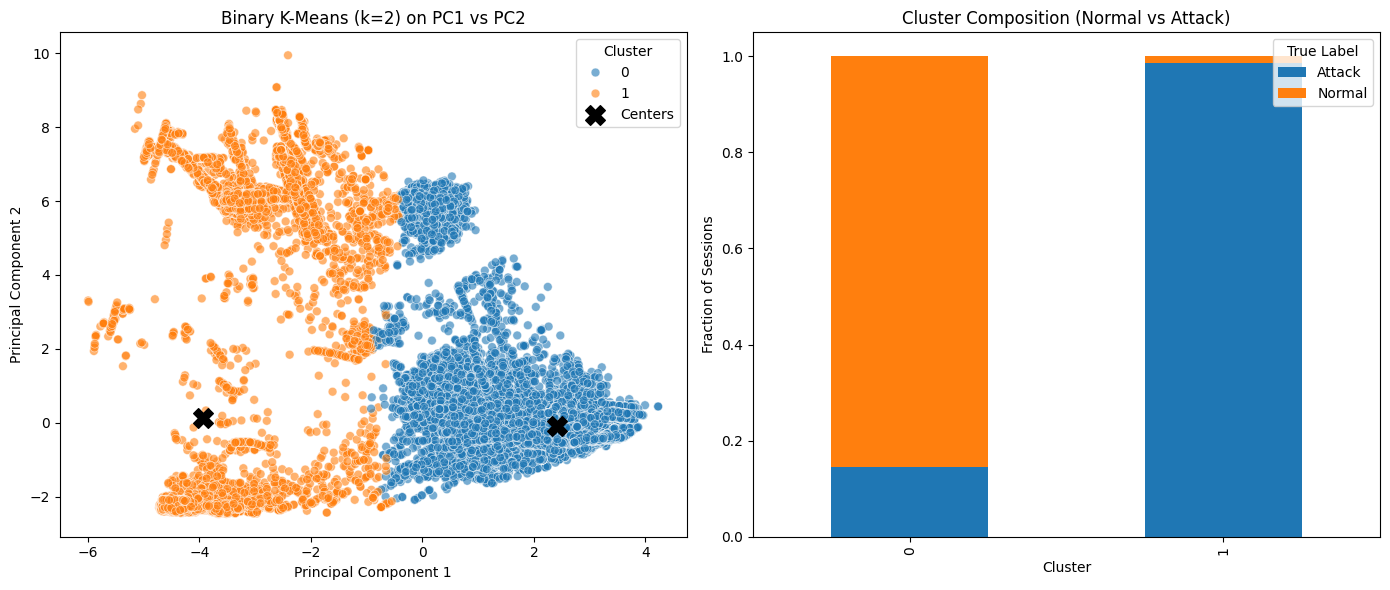

In [ ]:
# Visuals:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter of PC1 vs PC2 colored by the two clusters
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=labels2,
    palette=["tab:blue", "tab:orange"],
    alpha=0.6,
    s=40,
    ax=ax1
)
# plot cluster centers
centers2 = km2.cluster_centers_
ax1.scatter(
    centers2[:, 0], centers2[:, 1],
    c="black", s=200, marker="X", label="Centers"
)
ax1.set_title("Binary K-Means (k=2) on PC1 vs PC2")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.legend(title="Cluster")

# Stacked bar chart of cluster composition 
comp2.plot.bar(
    stacked=True,
    color=["tab:blue", "tab:orange"],
    ax=ax2
)
ax2.set_title("Cluster Composition (Normal vs Attack)")
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Fraction of Sessions")
ax2.legend(title="True Label", loc="upper right")

plt.tight_layout()
plt.show()


Above we plot our two‐cluster solution in PCA space (left) and show how each cluster breaks down into Normal vs Attack (right):

| Scatter PC1 vs PC2 | Stacked Bar |
|:-----------------------------------------------------------:|:------------------------------------------------:|
| **PC1 vs PC2**: Each point is a network session, colored by its K-Means label. The two black “X”s mark the cluster centroids. | **Cluster Composition**: A stacked bar showing the fraction of Normal (orange) vs Attack (blue) sessions in each cluster. |

**Key takeaways:**
- **Cluster 0 → Normal**  
  - Centroid sits in the high‐density Normal region.  
  - Contains **85.4 %** true Normal sessions.  
  - **14.6 %** of Normal traffic is mis‐clustered as Attack.
- **Cluster 1 → Attack**  
  - Centroid aligns with the dense “malicious” cloud.  
  - Captures **98.6 %** of all Attack sessions.  
  - Only **1.4 %** of genuinely benign sessions fall here.

These visuals confirm our numeric metrics:  
we’ve found a reasonably clean split that catches nearly all attacks, at the cost of flagging ~15 % of benign traffic as anomalies.  